In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.special import lambertw
import pandas as pd

In [2]:
def mylambertw(x):
    if(x == -math.exp(-1)):
        return -1
    return lambertw(x)

### Q1

#### (c)

In [123]:
# xvec = []
# yvec = [0.1*i for i in range(-10, 30)]
# for y in yvec:
#     xvec.append(y*math.exp(y))
# plt.plot(xvec, yvec)
# plt.xlabel("x = yexp(y)")
# plt.ylabel("y")
# plt.title("W(x)")
# plt.show()

In [103]:
r = 0.1
def qstar(x):
    value = (1+mylambertw(-math.exp(-2*r*x-1)).real)/2
    return value

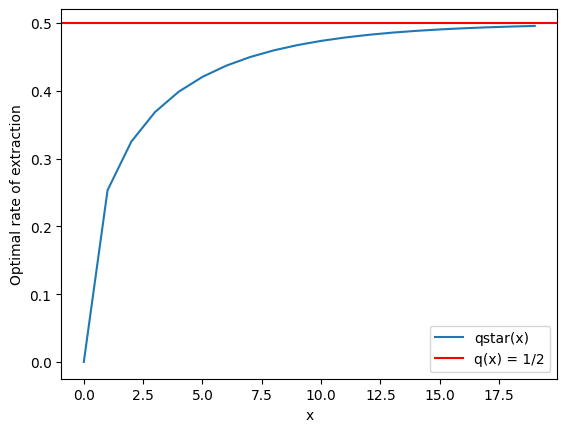

In [106]:
xvec = [i for i in range(0, 20)]
qstarvec = [] # Because lambertw(0) returns NaN when x=0
for x in xvec:
    qstarvec.append(qstar(x))
plt.plot(xvec, qstarvec, label = "qstar(x)")
plt.axhline(1/2, color = "r", label = "q(x) = 1/2")
plt.xlabel("x")
plt.ylabel("Optimal rate of extraction")
plt.legend()
plt.show()

In [366]:
print(mylambertw(-math.exp(-3)))

(-0.05246909745771487+0j)


In [367]:
tau = -math.log(-lambertw(-math.exp(-3)).real)/r
print(tau)

29.475309025422852


#### (d)

In [368]:
well_value = (1+lambertw(-math.exp(-3)).real)**2/0.4
print(well_value)

2.2445370281814934


### Q2

In [76]:
r = 0.1

#### (a)

In [77]:
xb = 5

In [78]:
def f(c):
    return (1+c)*math.log((1+c)/(4*c-2)) + 3*c

def squared_error(pmt): #? How to pass args here?
    c = pmt[0]
    # return (f(c) - 4.125)**2
    return (4/(9*r)*((1+c)*math.log((1+c)/(2*(2*c-1))) - 3*(1-c)) - xb)**2

output = minimize(squared_error, [0.55]) #? How to pass args here?

In [79]:
c = output.x[0]
print("cost:", c) # c has to be < 1; hence we start from below 1

cost: 0.5905573715778599


In [80]:
# cvec = [i for  i in range(1, 20)]
# fcvec = []
# for c in cvec:
#     fcvec.append(f(c))
# plt.plot(cvec, fcvec)
# plt.axhline(4.125, color='r')
# plt.show()

#### (b)

In [81]:
def theta_large(c, r, x):
    return (1-2*c)*math.exp(1-2*c-2*r*x)

def theta_small(c, r, x):
    return -math.exp(-9*r*x/(4*(1+c)) - 1)

def u(c, r, x, xb):
    return (1+mylambertw(theta_large(c, r, x-xb)).real)**2/(4*r)

In [82]:
well_value = u(c, r, 10, xb)
print(well_value)

2.213856275278776


#### (c)

In [83]:
t1 = 1/r*math.log(mylambertw(theta_large(c, 0.1, 0)).real/mylambertw(theta_large(c, 0.1, 5)).real)
print(t1)

11.22147425963023


In [84]:
t2 = 1/r*math.log(mylambertw(theta_small(c, 0.1, 0)).real/mylambertw(theta_small(c, 0.1, 5)).real) # eta - t1
print(t2)

14.795617563485173


##### Referencing Q1

In [85]:
t1 = 1/r*math.log(mylambertw(theta_large(1, 0.1, 5)).real/mylambertw(theta_large(1, 0.1, 10)).real)
print(t1)

11.061252421053245


In [86]:
t2 = 1/r*math.log(mylambertw(theta_large(1, 0.1, 0)).real/mylambertw(theta_large(1, 0.1, 5)).real)
print(t2)

18.414056604369605


#### (d)

In [87]:
def qstar1(c, r, x, xb):
    if(x >= xb):
        return (1+mylambertw(theta_large(c, r, x-xb)).real)/2
    return (1+c)/3*(1+mylambertw(theta_small(c, r, x)).real)

def qstar2(c, r, x, xb):
    if(x >= xb):
        return 0
    return 1/3*(1-2*c-(1+c)/2*mylambertw(theta_small(c, r, x)).real)

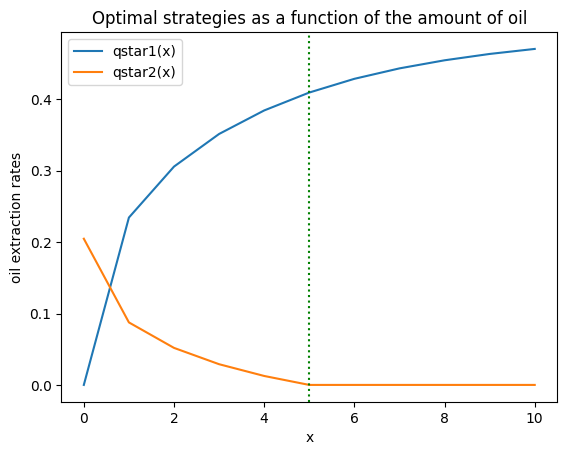

In [94]:
xvec = [i for i in range(11)]
qstar1vec = []
qstar2vec = []
for x in xvec:
    qstar1vec.append(qstar1(c, r, x, xb))
    qstar2vec.append(qstar2(c, r, x, xb))
qstar1vec = np.array(qstar1vec)
qstar2vec = np.array(qstar2vec)
plt.plot(xvec, qstar1vec, label = "qstar1(x)")
plt.plot(xvec, qstar2vec, label = "qstar2(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("oil extraction rates")
plt.axvline(5, color = 'g', linestyle = "dotted")
plt.title("Optimal strategies as a function of the amount of oil")
plt.show()

#### (e)

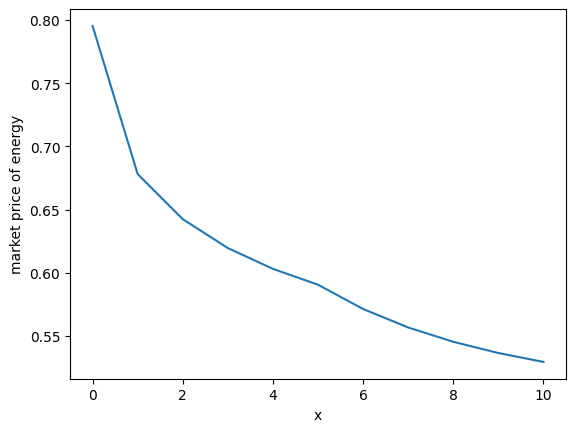

In [96]:
plt.plot(xvec, 1-qstar1vec-qstar2vec)
plt.xlabel("x")
plt.ylabel("market price of energy")
# plt.title("Optimal strategies as a function of the amount of oil")
plt.show()

### Q3

#### Ideas:

#### position of argmax
#### position of argmin
#### Last - First
#### Max - Min
#### Total slope/one slope (slope of one segment)

#### Sum of the absolute values of the slope: 
- For C, B => ~equal to the actual start to end slope
- For Humped, twice or much larger
- For flat, almost equal to 0

#### Check for presence of 3-4 length decreasing/increasing subarray
- For humped max, increasing then decreasing; for humped min, vice versa

- 1 -> Contango
- 2 -> Backwardation
- 3 -> Humped peak
- 4 -> Humped trough
- 5 -> flat
- 6 -> Humped peak trough

#### Can or maybe should construct a table containing these signal values for each of the curves so as to determine which signals are the storngest/sharpest/best differentiators between curves and emply them while differentiating the curves.

In [3]:
ground_truth = pd.DataFrame(index = [2021, 2022, 2023, 2024, 2025], columns = ["HG", "NG"])
ground_truth.loc[:, "HG"] = [[4], [1, 4], [1, 4], [1, 2, 3], [1]]
ground_truth.loc[:, "NG"] = [[2, 4, 6], [1, 2, 4, 6], [1, 3], [1, 3], [2, 3]]
ground_truth

,HG,NG
2021,[4],"[2, 4, 6]"
2022,"[1, 4]","[1, 2, 4, 6]"
2023,"[1, 4]","[1, 3]"
2024,"[1, 2, 3]","[1, 3]"
2025,[1],"[2, 3]"


#### (a)

In [4]:
def determine_curve_type(v):
    lv = len(v)
    maxi = v.argmax() + 1
    mini = v.argmin() + 1
    lmf_frac = abs(v.iloc[-1] - v.iloc[0])/v.iloc[0]
    maxmf_frac = (v.iloc[maxi-1] - v.iloc[0])/v.iloc[0]
    minmf_frac = (v.iloc[0] - v.iloc[mini-1])/v.iloc[0]

    mark1 = lv/6
    mark2 = lv-lv/6

    # Contango: (similar structure for Backwardation)
    #   main signal: maxi in last 3-4, min in first 3-4
    #   lmf_frac: for filtering out noise
    if(mini <= mark1 and lmf_frac>=0.9*maxmf_frac):
        curve_type = 1
    # Backwardation: maxi in first 3-4, mini in last 3-4
    elif(maxi <= mark1 and lmf_frac>=0.9*minmf_frac):
        curve_type = 2
    # Humped peak trough 
    elif(mark1<maxi<mark2 and mark1<mini<mark2):
        curve_type = 6
    # Humped peak: maxi in middle 8-10
    elif(mark1<maxi<mark2 and maxmf_frac>=0.01):
        curve_type = 3
    # Humped trough: mini in middle 8-10
    elif(mark1<mini<mark2 and minmf_frac>=0.01):
        curve_type = 4
    # flat
    else:
        curve_type = 5

    return curve_type

In [5]:
# Data fetching and filtering
## HG
data_hg = pd.read_excel("fcurves_data.xlsx", sheet_name = "HG")

## NG
data_ng = pd.read_excel("fcurves_data.xlsx", sheet_name = "NG")
date_col = data_ng[['Dates']]
# Select every 12th contract, starting from NG1
annual_contracts = data_ng.iloc[:, 1::12]
# Combine the date column with the selected contracts
data_ng = pd.concat([date_col, annual_contracts], axis=1)

# Data Processing
data = [data_hg, data_ng]
names = ["HG", "NG"]
num_dates, num_contracts = [], []
ldata = len(data)
for i in range(ldata):
    data[i] = data[i][data[i].iloc[:, 1:].isnull().all(axis=1) == False].reset_index(drop = True) # Keep those rows where not all values are null (drop those where all values are null)
    # Feature generation
    # num_dates = data[i].shape[0]
    # num_contracts = data[i].shape[1] - 1 # since first column is of Date
    num_dates.append(data[i].shape[0])
    num_contracts.append(data[i].shape[1] - 1) # since first column is of Date
    data[i]["curve_type"] = data[i].apply(lambda x: determine_curve_type(x.iloc[1:num_contracts[i]+1]), axis=1)
    data[i]["Year"] = data[i]["Dates"].transform(lambda x: x.year)

In [6]:
for i in range(ldata):
    table = data[i].groupby("curve_type").size()/len(data[i])*100
    print(names[i])
    print(table)
    print("")

HG
curve_type
1    54.554171
2     0.767018
3     6.327900
4    20.997124
5    13.518696
6     3.835091
dtype: float64

NG
curve_type
1    20.038351
2     9.971237
3    44.391179
4    19.654842
5     1.150527
6     4.793864
dtype: float64



#### (b)

HG
curve_type     1     2     3     4     5     6
Year                                          
2021        0.00  0.00  0.00  1.00  0.00  0.00
2022        0.16  0.00  0.02  0.48  0.20  0.14
2023        0.69  0.00  0.00  0.04  0.28  0.00
2024        0.61  0.03  0.25  0.02  0.08  0.02
2025        1.00  0.00  0.00  0.00  0.00  0.00



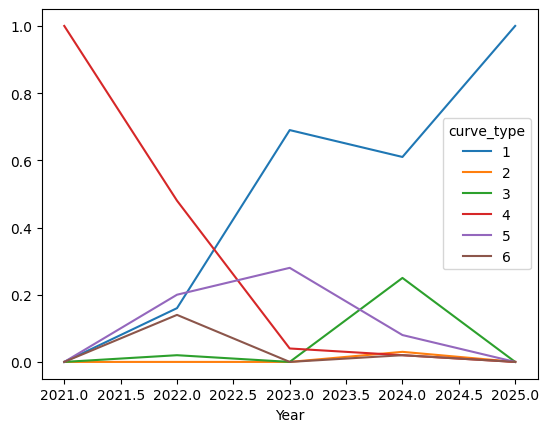

NG
curve_type     1     2     3     4     5     6
Year                                          
2021        0.00  0.34  0.00  0.41  0.00  0.25
2022        0.03  0.20  0.00  0.68  0.00  0.10
2023        0.61  0.00  0.39  0.00  0.00  0.00
2024        0.19  0.00  0.77  0.00  0.04  0.00
2025        0.00  0.13  0.84  0.00  0.01  0.02



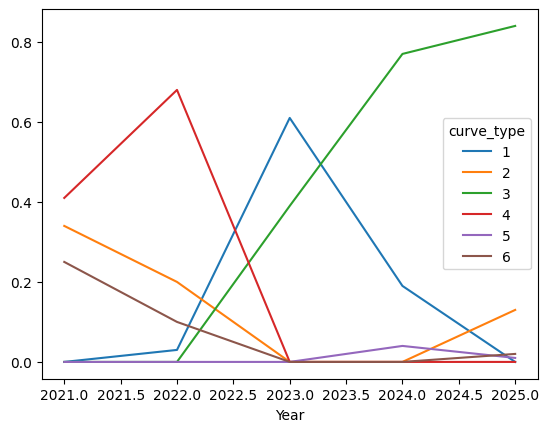

In [7]:
for i in range(ldata):
    data_by_year_curve = data[i].groupby(["Year", "curve_type"]).size().unstack(fill_value = 0)
    data_by_year_curve = data_by_year_curve.div(data_by_year_curve.sum(axis = 1), axis=0).round(2)
    print(names[i])
    print(data_by_year_curve)
    print("")
    data_by_year_curve.plot()
    plt.show()
# type(data_hg_by_year_curve) # pd.DataFrame

<Axes: >

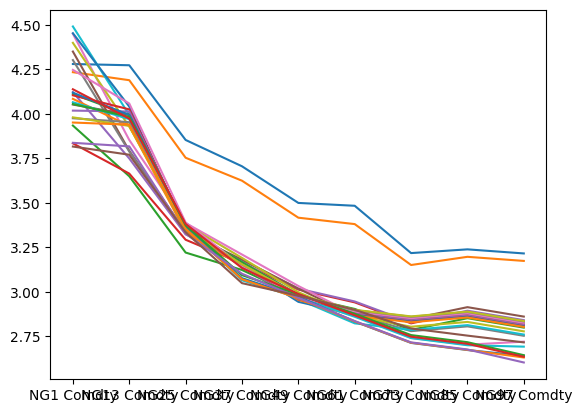

In [74]:
data_index = 1 #  & (data[data_index]["curve_type"]==4)
temp = data[data_index][(data[data_index]["Year"] == 2025) & (data[data_index]["curve_type"] == 2)]
temp.iloc[:, 1: num_contracts[data_index]+1].T.plot(legend = False)
# temp.iloc[np.random.randint(0, len(temp)), 1:num_contracts[data_index]+1].T.plot(legend = False)
# data[data_index][(data[data_index]["Year"] == 2022) & (data[data_index]["curve_type"] == 2)].iloc[48, 1:num_contracts[data_index]+1].T.plot(legend = False)

# Problems:
## HG-2021: 
## HG-2022: 5 should be 1 (probably because min index is in between) (false negative)
## HG-2023: 5 should be 4/6 (false neg)
## HG-2024: 5 should be 3
## HG-2025: 
## NG-2021: 
## NG-2022: 
## NG-2023: 
## NG-2024:
## NG-2025: 

#### (c)

#### HG
- Humped troughs from 2021-2023 followed by Contangos (2023-2025)
- One of the main geopolitical events was the divergence between COMEX and LME due to imposition of US tariffs; this led to higher prices in COMEX (price premiums) as compared to LME where the prices were more subdued. Thus, the backwardations and humped troughs (in the initial years like 2021-2023) changed to strong contangos in late 2024 and 2025 (after/around when the tariffs were introduced and the tariff war began).

#### NG
- In 2021-2022, the curve was considerably downward slopping (either in complete backwardation or if not, then as a humped trough or humped peak trough)
- 2023-2024 saw the curve change to increasing (as contango (2023) or as humped peak (2024, 5))
- Yes, there were some structural changes that led the Backwardation seen in 2021-22 change to Contango in 2023-24 and eventually to tighter and flat prices in/around 2025
- Around 2021-22, there was increase in demand in the short term. What was seen was immediate supply shortages and high demand. Why? the number of drilled wells (supplying NG) got limited (probably due to COVID); thus US ability to supply NG was limited due to which supply fell short of demand.
- Then in 2023-24, as supply increased, storage levels built up and supply surplus remained high, short term prices went down, thus triggering contango.

#### (d)

#### 
- Slope is a measure of the rate of change of y with respect to x (i.e. dy/dx). In discrete terms, it can be approximated as delta_y/delta_x. However, this generally is done when the curve is smooth. In our case, it is not. So, we take average of the slopes of each piece (note that our function is piecewise linear) and define this as the slope for that day.
- However, also note that scales (of price change) of HG and NG are different. Hence, to compare across products/construct a robust measure, it is better to convert numbers to percentages. 
- Also note that for NG, 2 points are 1 year apart whereas for HG, they are just 1 month apart. So, take that also into account.
--------------
- If we take the absolute values of the consecutive point differences, that parameter will probably be higher for humped curves than for contango and backwardation; this absolute value parameter will capture the volatility of the curve.

In [98]:
def average_slope(v, dnm):
    lv = len(v)
    val = 0
    for i in range(lv-1):
        val += ((v.iloc[i+1]-v.iloc[i])/v.iloc[i])/dnm # normal sum
        # val += abs(v.iloc[i+1]-v.iloc[i])/v.iloc[i] # absolute sum
    val /= (lv-1)
    return val

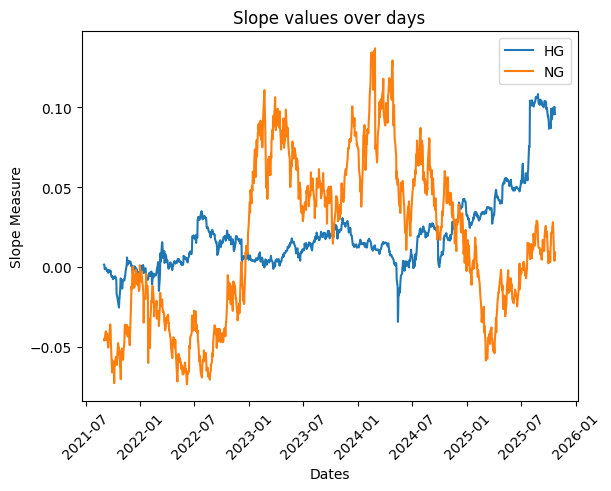

In [99]:
period_coefficient = [1/12, 1]
for i in range(ldata):
    data[i]["slope_value"] = data[i].apply(lambda x: average_slope(x[1:num_contracts[i]+1], period_coefficient[i]), axis=1)
    plt.plot(data[i]["Dates"], data[i]["slope_value"], label = names[i])
plt.xticks(rotation = 45)
plt.xlabel("Dates")
plt.ylabel("Slope Measure")
plt.legend()
plt.title("Slope values over days")
plt.show()

### Q4

### PJM

##### Date: 2025-10-31, Time: 12:57 PM ET

#### (a)

#####
- Electricity Demand: 87105 MW
- Met by Renewables: 13426 MW

In [352]:
print("Fraction of demand met by renewables:", 13426/87105)

Fraction of demand met by renewables: 0.15413581309913324


#### (b)

In [100]:
fuel_generated = {}
fuel_generated["Coal"] = 11842
fuel_generated["Gas"] = 33381
fuel_generated["Hydro"] = 344
fuel_generated["Multiple Fuels"] = 1002
fuel_generated["Nuclear"] = 27279
fuel_generated["Oil"] = 175
fuel_generated["Other Renewables"] = 527
fuel_generated["Solar"] = 8606
fuel_generated["Wind"] = 3949
fuel_generated = {x: v*100/sum(fuel_generated.values()) for x, v in fuel_generated.items()}
table = pd.DataFrame(sorted(fuel_generated.items(), key = lambda x: -x[1]), columns = ["Fuel", "% supplied"]).round(2)
table

,Fuel,% supplied
0,Gas,38.32
1,Nuclear,31.32
2,Coal,13.60
3,Solar,9.88
4,Wind,4.53
5,Multiple Fuels,1.15
6,Other Renewables,0.61
7,Hydro,0.39
8,Oil,0.20


#### (c)

##### Actuals (represented by Generation plot on the website) have mostly been able to keep track of the Forecast (represented by Forecast plot on the website) from 12 am to 12 pm except between 3:30 to 7:30 AM where the Actuals were less than the Forecast (although by a small fraction~3-5%).

##### As far as day-ahead forecasts are concerned, the actuals (or originals) are 5-7K more than the day-ahead forecasts (referred from dataviewer.pjm.com).

#### (d)

#####
- Highest LMP: 37.08 at PEPCO (Washington DC area)
- Lowest LMP: 20.48 at EKPC (East Kentucky)

Why is PEPCO High?
1. High demand from data centers, industrial facilities, extreme weather and urban and city population
2. PEPCO depends mainly on the non-renewable sources of energy (Gas, Nuclear, etc) which are now retiring. It did not accept proposals for Renewable energies like Solar and Wind back in 2021 due to which they just contribute 4% of the total supply.
3. High Delivery Fees, High taxes add up to the cost.

Why is EKPC low?
1. It serves mainly to the rural and sub-urban areas where demand for the electricity is not so high.
2. EKPC is based on coal fuel (Mason, Pulaski; Kentucky being the 6th largest coal producing state, so lots of coal resources => not retiring) and Natural gas plants (Clark, Oldham) that are still abundant along with renewable energy resourses (Baron, Greenup). Multiple sources of energy supply keep prices low.
3. EKPC is a not-for-profit cooperative organization and hence, would strive to keep the prices low.

### ERCOT

##### Date: 2025-10-31, Time: 1:27 PM ET

#### (a)

#### 
- Current Demand: 50094
- fraction fulfilled by Renewables = 64.5% ~ 0.645

#### (b)

In [101]:
fuel_generated = {}
fuel_generated["Coal and Lignite"] = 4287
fuel_generated["Hydro"] = 0
fuel_generated["Natural Gas"] = 9925
fuel_generated["Nuclear"] = 3738
fuel_generated["Other"] = 0
fuel_generated["Power Storage"] = 43
fuel_generated["Solar"] = 25673
fuel_generated["Wind"] = 7008
fuel_generated = {x: v*100/sum(fuel_generated.values()) for x, v in fuel_generated.items()}
table = pd.DataFrame(sorted(fuel_generated.items(), key = lambda x: -x[1]), columns = ["Fuel", "% supplied"]).round(2)
table

,Fuel,% supplied
0,Solar,50.66
1,Natural Gas,19.59
2,Wind,13.83
3,Coal and Lignite,8.46
4,Nuclear,7.38
5,Power Storage,0.08
6,Hydro,0.00
7,Other,0.00


#### (c)

##### Here, by forecast, we mean the demand. For the previous hours, the committed capacity (or the supply) is considerably more than the demand to be fulfilled (Almost 14k MW more => 30-35% more than the demand). For day-ahead forecasts, the supply is again well above the forecasts (for Nov 1-2-3-4-5) i.e. around 1.4-1.8 times that of the forecast.

#### (d)

##### Price is highest around the NorthCentral/East Region border; whereas it is the lowest diametrically opposite (farwest/west regions' border).

####
Northcentral/East Texas
- Dependent solely on ERCOT which is cut off/isolated from Eastern or Western US electricity interconnections, thus leading to kind of monopoly and hence higher costs
- more hot and tougher summers leading to more energy demand
- Consists of major population and industrial centers like Dallas and Fort Worth, leading to higher demand

West Texas
- More remote and rural, leading to modest demand
- More scope and investment in solar and wind energy resources (due to great plains present in/extending to the west texas region) leading to duopoly and stability of prices (Eg: Roscoe: largest wind farm of the state)
- Some areas of far west texas extend into/are supported by the western electricity interconnections (apart from ERCOT) leading to a more stable supply of electricity during ciritical times

#### References:
- https://www.ecoflow.com/us/blog/texas-electricity-prices-solar-solutions